In [1]:
!pip install iapws

In [2]:
from iapws import IAPWS97

In [3]:
# water_1 = IAPWS97(T=T1_K, x=x1); print(water_1.h); print(water_1.s)

In [5]:
p1_MPa = 6
x1 = 1

water_1 = IAPWS97(P=p1_MPa, x=x1)

In [6]:
p2_MPa = 1.2

In [12]:
# efficiency
eta = 1

In [20]:
h1_kJperKg = water_1.h
T1_K = water_1.T

In [8]:
s1_kJperKgPerK = water_1.s
s2_kJperKgPerK = s1_kJperKgPerK

In [9]:
water_2s = IAPWS97(P=p2_MPa, s=s2_kJperKgPerK)

In [18]:
h2s_kJperKg = water_2s.h
T2s_K = water_2s.T

In [13]:
h2a_kJperKg = -(eta*(h1_kJperKg - h2s_kJperKg) - h1_kJperKg); print(h2a_kJperKg)

2492.521739333356


In [15]:
w2s_mPerS = (2*(h1_kJperKg*1000 - h2s_kJperKg*1000))**(0.5)
print('(b) w2s_mPerS = {0:1.2f} m/s'.format(w2s_mPerS))

(b) w2s_mPerS = 764.25 m/s


In [16]:
import numpy as np
import matplotlib.pyplot as plt

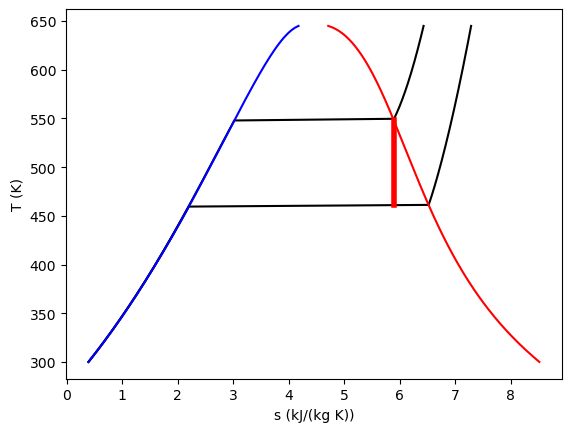

In [21]:
plt.figure()
plt.clf()
T = np.linspace(300, 372+273, 200) # range of temperatures
for P in [1.2, 6]: #MPa
    steam = [IAPWS97(T=t, P=P) for t in T]
    S = [s.s for s in steam]
    plt.plot(S, T, 'k-')

# saturated vapor and liquid entropy lines
svap = [s.s for s in [IAPWS97(T=t, x=1) for t in T]]
sliq = [s.s for s in [IAPWS97(T=t, x=0) for t in T]]

plt.plot(svap, T, 'r-')
plt.plot(sliq, T, 'b-')

plt.xlabel('s (kJ/(kg K))')
plt.ylabel('T (K)')
plt.savefig('iawps-steam.png')

plt.plot([s1_kJperKgPerK, s2_kJperKgPerK], [T1_K, T2s_K], 'r-', lw=4) # Path 1 to 2

#T23 = np.linspace(T2, T3)
#S23 = [s.s for s in [IAPWS97(P=P2, T=t) for t in T23]]

#T41 = np.linspace(T4, T1 - 0.01) # subtract a tiny bit to make sure we get a liquid
#S41 = [s.s for s in [IAPWS97(P=P1, T=t) for t in T41]]

#plt.plot(S23, T23, 'b-', lw=4) # path from 2 to 3 is isobaric
#plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 is isentropic
#plt.plot(S41, T41, 'k-', lw=4) # and from 4 to 1 is isobaric